# Credit-Card-Fraud-Detection
* The dataset is from kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import cmath

In [2]:
# Reading file
df = pd.read_csv("creditcard.csv")

## Task 1

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# The data is mostly transformed from its original form, for confidentiality reasons.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* No missing values, that makes things a little easier
* Let's see how time compares across fraudulent and normal transactions.

In [6]:
print("Fraud")
print(df.Time[df.Class == 1].describe())
print()
print("Normal")
print(df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


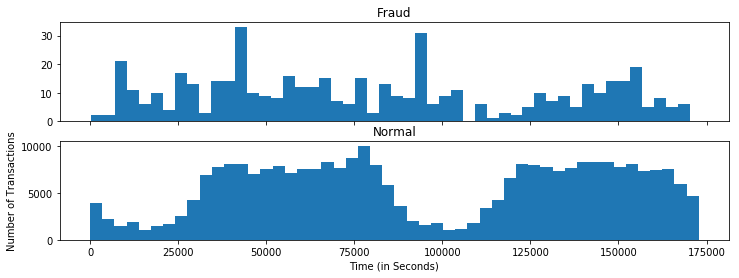

In [7]:
f, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

axis1.hist(df.Time[df.Class == 1], bins = bins)
axis1.set_title('Fraud')

axis2.hist(df.Time[df.Class == 0], bins = bins)
axis2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [8]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


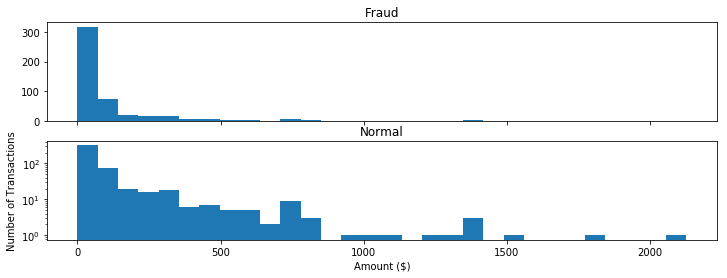

In [9]:
f, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

bins = 30

axis1.hist(df.Amount[df.Class == 1], bins = bins)
axis1.set_title('Fraud')

axis2.hist(df.Amount[df.Class == 1], bins = bins)
axis2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [10]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

* Most transactions are small amounts, less than 100
* Fraudulenttransactions have maximum values of farless than normal transactions
* let's compare Time and Amount and see if we can learn anything new.

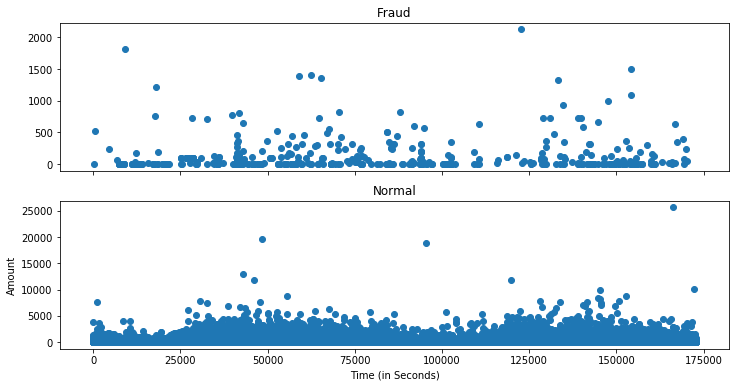

In [11]:
f, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

axis1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
axis1.set_title('Fraud')

axis2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
axis2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Nothing too useful here because of overlapping.

Next let's take a look at the anonymized features.

In [12]:
#Select only the anonymized features.
v_features = df.ix[:, 1:29].columns

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


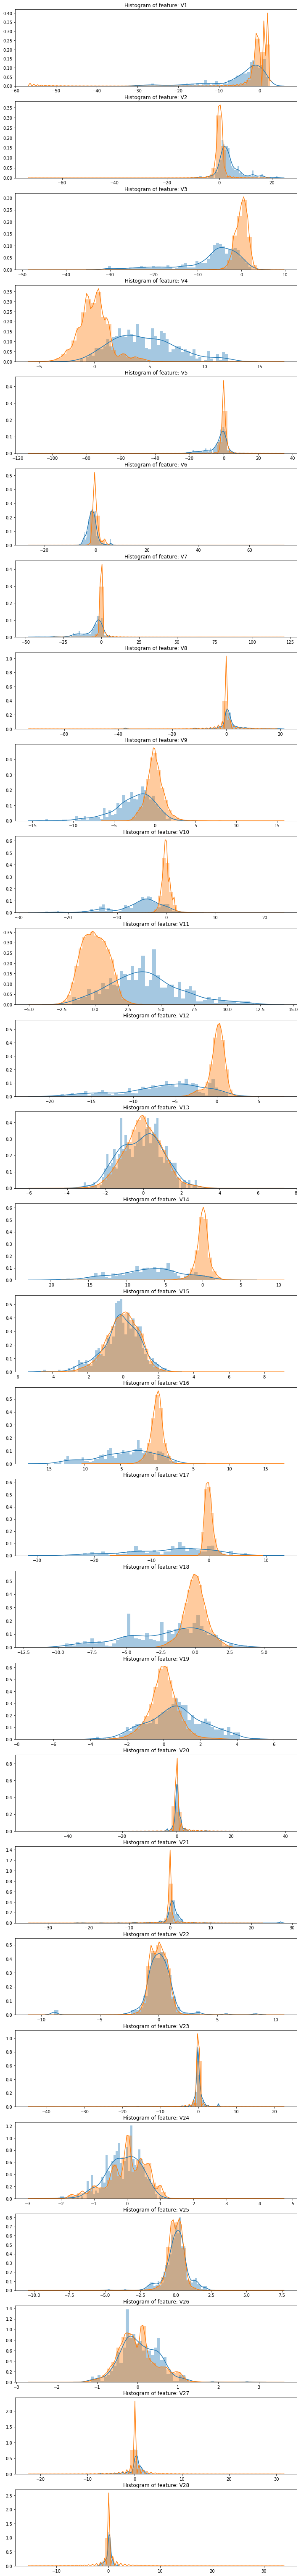

In [13]:
plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i, x in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[x][df.Class == 1], bins=50)
    sns.distplot(df[x][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(x))
plt.show()

In [14]:
#Create a new feature for normal (non-fraudulent) transactions.
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [15]:
#Rename 'Class' to 'Fraud'.
df = df.rename(columns={'Class': 'Fraud'})

In [16]:
#492 fraudulent transactions, 284,315 normal transactions.
#0.172% of transactions were fraud. 
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())

1.0    284315
0.0       492
Name: Normal, dtype: int64

0    284315
1       492
Name: Fraud, dtype: int64


## Task 2

In [17]:
# Create Numpy array df_all of all the transactions
dfx = pd.read_csv('creditcard.csv')
f_arr = np.array(dfx)

In [18]:
a = np.random.randint(1001, size=100)

for j in a:
    data = [] #array to store similarity values
    index = [] #array to store indexes of similarity values
    class1 = [] #array to store Class values

    for i in range(0,len(f_arr)):
        numerator = np.dot(f_arr[j],f_arr[i])     #computing dot product #numertor dot product (vi, vj)
        sqa = np.square(f_arr[j])                  #computing square to find length(vi)
        sqb = np.square(f_arr[i])                  #computing square to find length(vj)
        sum_a = np.sum(sqa)                         #sum up the squared values
        sum_b = np.sum(sqb)                         #sum up the squared values
        da = np.sqrt(sum_a)                       #take sqrt of the sum of squared values #length(vi)
        db = np.sqrt(sum_b)                       #take sqrt of the sum of squared values #length(vj)
        denominator = da * db                     #denominator length(vi) * length(vj)
        value = numerator/denominator             #similarity(i,j) value
        fvalue = cmath.acos(value)                 #taking inverse cosine
        data.append(fvalue)                     #appending similarity values to l_data
        index.append(i)                         #appending index values to l_index
        class1.append(dfx['Class'][i])            #appending class values to l_class

    f_res = pd.DataFrame({'Similarity':data,'Index':index,'Class':class1})  #create DF with columns 'Similarity','Index','Class'
    f_sorted = f_res.sort_values('Similarity',axis =0,ascending=True)            #Sort the DF to get top 10 transactions in the dataset which have the lowest similarity(i,j).
    print(f_sorted.head(10))                                                     #top 10 lowest similar values  
    print('--------------------\n')
    print('Given transcation id :',j,'Class:',f_res['Class'][j])
    print('--------------------------------------\n Similar transcations\n ---------------------------\n')
    for i in range(0,10):
         print('Class:',f_res['Class'][f_sorted.index[i]],'Similarity = ',f_sorted['Similarity'][f_sorted.index[i]] ,'#trancation id = ',f_sorted.index[i])
            
    print()

      Class  Index                   Similarity
622       0    622  (1.4901161193847656e-08-0j)
430       0    430    (0.004714185468555106-0j)
1739      0   1739    (0.005080334865895591-0j)
2054      0   2054    (0.005741335624061004-0j)
1012      0   1012    (0.005931559388493665-0j)
477       0    477      (0.0062246697195396-0j)
941       0    941   (0.0064054355037339895-0j)
2110      0   2110    (0.006522877775867761-0j)
1736      0   1736    (0.006621901479297338-0j)
3269      0   3269    (0.006677095857505167-0j)
--------------------

Given transcation id : 622 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  (1.4901161193847656e-08-0j) #trancation id =  622
Class: 0 Similarity =  (0.004714185468555106-0j) #trancation id =  430
Class: 0 Similarity =  (0.005080334865895591-0j) #trancation id =  1739
Class: 0 Similarity =  (0.005741335624061004-0j) #trancation id =  2054
Class: 0 Similarity =  (0.005931559

      Class  Index                   Similarity
15        0     15  (1.4901161193847656e-08-0j)
179       0    179     (0.21296990009866926-0j)
213       0    213      (0.2150814222005954-0j)
66        0     66      (0.2158804881089358-0j)
191       0    191     (0.21592322196469751-0j)
158       0    158     (0.21654271266075126-0j)
651       0    651     (0.21709395501920023-0j)
396       0    396     (0.21783794635909465-0j)
468       0    468     (0.21821375925992048-0j)
2622      0   2622     (0.21854747306015554-0j)
--------------------

Given transcation id : 15 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  (1.4901161193847656e-08-0j) #trancation id =  15
Class: 0 Similarity =  (0.21296990009866926-0j) #trancation id =  179
Class: 0 Similarity =  (0.2150814222005954-0j) #trancation id =  213
Class: 0 Similarity =  (0.2158804881089358-0j) #trancation id =  66
Class: 0 Similarity =  (0.21592322196469751-0

       Class  Index                  Similarity
933        0    933                         -0j
3264       0   3264   (0.005369544916350686-0j)
4799       0   4799    (0.00559475913520011-0j)
3189       0   3189   (0.005624749876739564-0j)
3340       0   3340  (0.0056399402100238165-0j)
10054      0  10054   (0.005650024608137133-0j)
928        0    928   (0.005684587579679375-0j)
6160       0   6160   (0.005686189919095434-0j)
13292      0  13292   (0.005718031439475433-0j)
53180      0  53180   (0.005740034923883025-0j)
--------------------

Given transcation id : 933 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -0j #trancation id =  933
Class: 0 Similarity =  (0.005369544916350686-0j) #trancation id =  3264
Class: 0 Similarity =  (0.00559475913520011-0j) #trancation id =  4799
Class: 0 Similarity =  (0.005624749876739564-0j) #trancation id =  3189
Class: 0 Similarity =  (0.0056399402100238165-0j) #trancati

      Class  Index                  Similarity
895       0    895                         -0j
864       0    864   (0.002260424304223084-0j)
903       0    903  (0.0033373089737988274-0j)
883       0    883   (0.005069711433111681-0j)
1527      0   1527  (0.0057102728505283576-0j)
1736      0   1736  (0.0058066561684080335-0j)
917       0    917   (0.005851182600029225-0j)
5018      0   5018   (0.006084131153642644-0j)
2179      0   2179  (0.0061592489075474105-0j)
3217      0   3217   (0.006240815757633269-0j)
--------------------

Given transcation id : 895 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -0j #trancation id =  895
Class: 0 Similarity =  (0.002260424304223084-0j) #trancation id =  864
Class: 0 Similarity =  (0.0033373089737988274-0j) #trancation id =  903
Class: 0 Similarity =  (0.005069711433111681-0j) #trancation id =  883
Class: 0 Similarity =  (0.0057102728505283576-0j) #trancation id =  152

        Class   Index                 Similarity
881         0     881   -2.9802322387695312e-08j
18546       0   18546  (0.007381454347904406-0j)
10644       0   10644  (0.007417647714833387-0j)
3539        0    3539  (0.007441442896807125-0j)
34493       0   34493  (0.007450613888187052-0j)
130046      0  130046  (0.007450856672783822-0j)
63439       0   63439  (0.007452094778760915-0j)
72407       0   72407  (0.007465172720610877-0j)
13137       0   13137  (0.007479964148420206-0j)
3329        0    3329  (0.007497143291347661-0j)
--------------------

Given transcation id : 881 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -2.9802322387695312e-08j #trancation id =  881
Class: 0 Similarity =  (0.007381454347904406-0j) #trancation id =  18546
Class: 0 Similarity =  (0.007417647714833387-0j) #trancation id =  10644
Class: 0 Similarity =  (0.007441442896807125-0j) #trancation id =  3539
Class: 0 Similarity =  (

       Class  Index                  Similarity
880        0    880                         -0j
2486       0   2486  (0.0045079641494286705-0j)
1155       0   1155  (0.0048088289371119985-0j)
2379       0   2379   (0.004898296888468299-0j)
5299       0   5299  (0.0050113274895883285-0j)
39201      0  39201   (0.005111613335432393-0j)
29279      0  29279   (0.005120964473668065-0j)
9907       0   9907   (0.005206228108561688-0j)
5291       0   5291   (0.005229997202407028-0j)
17454      0  17454   (0.005230538168337935-0j)
--------------------

Given transcation id : 880 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -0j #trancation id =  880
Class: 0 Similarity =  (0.0045079641494286705-0j) #trancation id =  2486
Class: 0 Similarity =  (0.0048088289371119985-0j) #trancation id =  1155
Class: 0 Similarity =  (0.004898296888468299-0j) #trancation id =  2379
Class: 0 Similarity =  (0.0050113274895883285-0j) #tranc

      Class  Index                  Similarity
815       0    815    -2.1073424255447017e-08j
1312      0   1312    (0.00222669002653073-0j)
1731      0   1731   (0.002666895057994188-0j)
1495      0   1495   (0.002900920570830395-0j)
491       0    491   (0.003108914674933981-0j)
817       0    817  (0.0033334728497895847-0j)
700       0    700  (0.0033360514688894447-0j)
1648      0   1648  (0.0033715023096786765-0j)
660       0    660  (0.0034490758148982424-0j)
1561      0   1561    (0.00358208097730015-0j)
--------------------

Given transcation id : 815 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -2.1073424255447017e-08j #trancation id =  815
Class: 0 Similarity =  (0.00222669002653073-0j) #trancation id =  1312
Class: 0 Similarity =  (0.002666895057994188-0j) #trancation id =  1731
Class: 0 Similarity =  (0.002900920570830395-0j) #trancation id =  1495
Class: 0 Similarity =  (0.003108914674933981-0j) 

      Class  Index                   Similarity
524       0    524  (2.1073424255447017e-08-0j)
1291      0   1291     (0.00815196594850121-0j)
1101      0   1101    (0.008209513708441932-0j)
2170      0   2170    (0.008236307015433765-0j)
1159      0   1159    (0.008262644543193606-0j)
1244      0   1244    (0.008272860573780386-0j)
1627      0   1627    (0.008292824067059765-0j)
1434      0   1434    (0.008304805051197947-0j)
1564      0   1564    (0.008349328651331847-0j)
515       0    515    (0.008373481499010937-0j)
--------------------

Given transcation id : 524 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  (2.1073424255447017e-08-0j) #trancation id =  524
Class: 0 Similarity =  (0.00815196594850121-0j) #trancation id =  1291
Class: 0 Similarity =  (0.008209513708441932-0j) #trancation id =  1101
Class: 0 Similarity =  (0.008236307015433765-0j) #trancation id =  2170
Class: 0 Similarity =  (0.008262644

      Class  Index                  Similarity
980       0    980                         -0j
1736      0   1736   (0.006490704634366894-0j)
883       0    883  (0.0064935303567066295-0j)
5261      0   5261    (0.00673881188501731-0j)
3658      0   3658  (0.0068403355753251715-0j)
3705      0   3705  (0.0069009097231677126-0j)
3264      0   3264   (0.006933030104234372-0j)
2175      0   2175    (0.00697251740153938-0j)
6518      0   6518  (0.0069999296372854946-0j)
922       0    922   (0.007001122765810651-0j)
--------------------

Given transcation id : 980 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -0j #trancation id =  980
Class: 0 Similarity =  (0.006490704634366894-0j) #trancation id =  1736
Class: 0 Similarity =  (0.0064935303567066295-0j) #trancation id =  883
Class: 0 Similarity =  (0.00673881188501731-0j) #trancation id =  5261
Class: 0 Similarity =  (0.0068403355753251715-0j) #trancation id =  36

      Class  Index                   Similarity
579       0    579  (2.5809568279517847e-08-0j)
713       0    713    (0.007629972776819609-0j)
2061      0   2061    (0.007983183416489898-0j)
2114      0   2114     (0.00811958686146029-0j)
833       0    833    (0.008261860362452241-0j)
1902      0   1902    (0.008324919827411001-0j)
2117      0   2117     (0.00834160125238565-0j)
3509      0   3509    (0.008696228923129438-0j)
1183      0   1183    (0.008708588609526537-0j)
1311      0   1311     (0.00877504238791699-0j)
--------------------

Given transcation id : 579 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  (2.5809568279517847e-08-0j) #trancation id =  579
Class: 0 Similarity =  (0.007629972776819609-0j) #trancation id =  713
Class: 0 Similarity =  (0.007983183416489898-0j) #trancation id =  2061
Class: 0 Similarity =  (0.00811958686146029-0j) #trancation id =  2114
Class: 0 Similarity =  (0.0082618603

     Class  Index                 Similarity
8        0      8                        -0j
150      0    150   (0.05813464421199994-0j)
20       0     20   (0.05864192549962599-0j)
140      0    140  (0.058750511468532385-0j)
89       0     89   (0.06009776975874219-0j)
174      0    174   (0.06903375014790071-0j)
164      0    164   (0.07195925115475953-0j)
51       0     51   (0.07361660976676643-0j)
12       0     12   (0.07672071680434721-0j)
3        0      3   (0.08722590258221008-0j)
--------------------

Given transcation id : 8 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -0j #trancation id =  8
Class: 0 Similarity =  (0.05813464421199994-0j) #trancation id =  150
Class: 0 Similarity =  (0.05864192549962599-0j) #trancation id =  20
Class: 0 Similarity =  (0.058750511468532385-0j) #trancation id =  140
Class: 0 Similarity =  (0.06009776975874219-0j) #trancation id =  89
Class: 0 Similarity =  (0.069033

      Class  Index                 Similarity
280       0    280   -2.9802322387695312e-08j
303       0    303  (0.013603290687876551-0j)
286       0    286  (0.015560674582248794-0j)
1690      0   1690  (0.016335571347136618-0j)
2769      0   2769   (0.01659932587722653-0j)
1469      0   1469  (0.016605743222491018-0j)
776       0    776   (0.01667449960051373-0j)
1588      0   1588  (0.016812294949545857-0j)
1662      0   1662   (0.01685461802930934-0j)
1259      0   1259   (0.01689219905821251-0j)
--------------------

Given transcation id : 280 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -2.9802322387695312e-08j #trancation id =  280
Class: 0 Similarity =  (0.013603290687876551-0j) #trancation id =  303
Class: 0 Similarity =  (0.015560674582248794-0j) #trancation id =  286
Class: 0 Similarity =  (0.016335571347136618-0j) #trancation id =  1690
Class: 0 Similarity =  (0.01659932587722653-0j) #trancation i

     Class  Index                Similarity
42       0     42                       -0j
98       0     98  (0.06831982109543103-0j)
92       0     92  (0.07976502522217366-0j)
243      0    243  (0.08533364457116188-0j)
251      0    251     (0.08553333255302-0j)
432      0    432  (0.08706245223483244-0j)
333      0    333  (0.08909649040181436-0j)
306      0    306  (0.08912851860500684-0j)
260      0    260  (0.09046221644758351-0j)
266      0    266  (0.09098790944510424-0j)
--------------------

Given transcation id : 42 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -0j #trancation id =  42
Class: 0 Similarity =  (0.06831982109543103-0j) #trancation id =  98
Class: 0 Similarity =  (0.07976502522217366-0j) #trancation id =  92
Class: 0 Similarity =  (0.08533364457116188-0j) #trancation id =  243
Class: 0 Similarity =  (0.08553333255302-0j) #trancation id =  251
Class: 0 Similarity =  (0.08706245223483244-0

      Class  Index                 Similarity
369       0    369                        -0j
375       0    375  (0.006908343173823999-0j)
626       0    626  (0.009268265606898491-0j)
875       0    875  (0.009486604358843216-0j)
1133      0   1133  (0.009985451973646338-0j)
524       0    524  (0.009990884133598768-0j)
1518      0   1518  (0.010135814565099877-0j)
1159      0   1159  (0.010257851374199569-0j)
597       0    597   (0.01040018982655046-0j)
1564      0   1564  (0.010516707301240096-0j)
--------------------

Given transcation id : 369 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -0j #trancation id =  369
Class: 0 Similarity =  (0.006908343173823999-0j) #trancation id =  375
Class: 0 Similarity =  (0.009268265606898491-0j) #trancation id =  626
Class: 0 Similarity =  (0.009486604358843216-0j) #trancation id =  875
Class: 0 Similarity =  (0.009985451973646338-0j) #trancation id =  1133
Class: 0 Si

      Class  Index                 Similarity
111       0    111                        -0j
497       0    497  (0.030099649056363368-0j)
2326      0   2326   (0.03229499580531495-0j)
762       0    762  (0.032828098899704915-0j)
5704      0   5704   (0.03290056039349059-0j)
1333      0   1333  (0.033048770600711756-0j)
7600      0   7600     (0.033840340116427-0j)
603       0    603   (0.03425564994476317-0j)
1446      0   1446  (0.034417077612431006-0j)
1552      0   1552   (0.03454467396550121-0j)
--------------------

Given transcation id : 111 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -0j #trancation id =  111
Class: 0 Similarity =  (0.030099649056363368-0j) #trancation id =  497
Class: 0 Similarity =  (0.03229499580531495-0j) #trancation id =  2326
Class: 0 Similarity =  (0.032828098899704915-0j) #trancation id =  762
Class: 0 Similarity =  (0.03290056039349059-0j) #trancation id =  5704
Class: 0 Sim

      Class  Index                 Similarity
707       0    707   -2.9802322387695312e-08j
1428      0   1428  (0.009219357538276848-0j)
1375      0   1375  (0.009231246658316497-0j)
830       0    830   (0.00938999163832992-0j)
1275      0   1275  (0.009762382750262788-0j)
1435      0   1435  (0.009833122724108587-0j)
1437      0   1437  (0.009967369718686612-0j)
2635      0   2635  (0.009982462812122781-0j)
2364      0   2364  (0.010047207506726205-0j)
724       0    724  (0.010145590197506054-0j)
--------------------

Given transcation id : 707 Class: 0
--------------------------------------
 Similar transcations
 ---------------------------

Class: 0 Similarity =  -2.9802322387695312e-08j #trancation id =  707
Class: 0 Similarity =  (0.009219357538276848-0j) #trancation id =  1428
Class: 0 Similarity =  (0.009231246658316497-0j) #trancation id =  1375
Class: 0 Similarity =  (0.00938999163832992-0j) #trancation id =  830
Class: 0 Similarity =  (0.009762382750262788-0j) #trancation 